In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy
import keras.models
import tensorflow
from keras.models import Sequential
from keras.layers import Dense

In [7]:
df = pd.read_csv('true_car_listings.csv')

In [8]:
df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


In [9]:
df.tail()

,Price,Year,Mileage,City,State,Vin,Make,Model
852117,63215,2017,9,Culver City,CA,YV1A22MK9H1013237,Volvo,S90T6
852118,72260,2017,3201,Englewood,NJ,YV4A22PL3H1186162,Volvo,XC90T6
852119,55999,2016,28941,Fort Collins,CO,YV4A22PL4G1000868,Volvo,XC90AWD
852120,60240,2017,3005,San Leandro,CA,YV4A22NLXH1006162,Volvo,V90
852121,76995,2017,2502,New York,NY,YV4BC0ZX1H1109845,Volvo,XC90T8


In [10]:
df.describe()

,Price,Year,Mileage
count,852122.000000,852122.000000,8.521220e+05
mean,21464.100210,2013.289145,5.250779e+04
std,13596.202241,3.414987,4.198896e+04
min,1500.000000,1997.000000,5.000000e+00
25%,13000.000000,2012.000000,2.383600e+04
50%,18500.000000,2014.000000,4.025600e+04
75%,26995.000000,2016.000000,7.218600e+04
max,499500.000000,2018.000000,2.856196e+06


In [11]:
df.columns

Index(['Price', 'Year', 'Mileage', 'City', 'State', 'Vin', 'Make', 'Model'], dtype='object')

In [15]:
df.nunique()

Price       47124
Year           22
Mileage    158836
City         2553
State          59
Vin        852075
Make           58
Model        2736
dtype: int64

In [20]:
df['Year'].unique()

array([2014, 2013, 2016, 2012, 2009, 2015, 2010, 2011, 2007, 2006, 2008,
       2004, 2017, 2005, 2003, 2002, 1999, 2001, 2000, 1998, 2018, 1997])

In [19]:
df['Make'].unique()

array(['Acura', 'Alfa', 'AM', 'Aston', 'Audi', 'Bentley', 'BMW', 'Buick',
       'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge', 'Ferrari', 'FIAT',
       'Fisker', 'Ford', 'Freightliner', 'Genesis', 'Geo', 'GMC', 'Honda',
       'HUMMER', 'Hyundai', 'INFINITI', 'Isuzu', 'Jaguar', 'Jeep', 'Kia',
       'Lamborghini', 'Land', 'Lexus', 'Lincoln', 'Lotus', 'Maserati',
       'Maybach', 'Mazda', 'McLaren', 'Mercedes-Benz', 'Mercury', 'MINI',
       'Mitsubishi', 'Nissan', 'Oldsmobile', 'Plymouth', 'Pontiac',
       'Porsche', 'Ram', 'Rolls-Royce', 'Saab', 'Saturn', 'Scion',
       'smart', 'Subaru', 'Suzuki', 'Tesla', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [ ]:
df['City'].unique()

In [18]:
df.isnull().sum()

Price      0
Year       0
Mileage    0
City       0
State      0
Vin        0
Make       0
Model      0
dtype: int64

In [17]:
df.dtypes

Price       int64
Year        int64
Mileage     int64
City       object
State      object
Vin        object
Make       object
Model      object
dtype: object

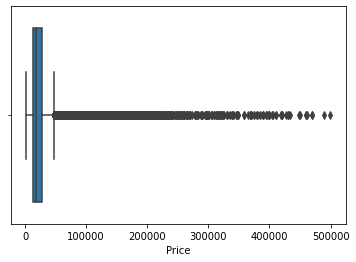

In [16]:
#detecting outliers
sns.boxplot(x=df['Price'])

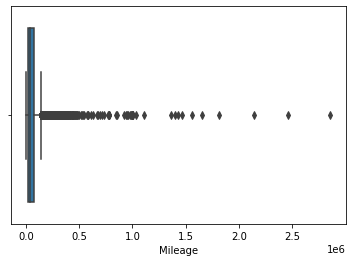

In [14]:
sns.boxplot(x=df['Mileage'])

In [13]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR =Q3-Q1
print(IQR)

Price      13995.0
Year           4.0
Mileage    48350.0
dtype: float64


In [21]:
df=df[-((df<(Q1 - 1.5 * IQR))|(df > (Q3 + 1.5 *IQR))).any(axis=1)]
df.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


(770733, 8)

,Price,Year,Mileage
Price,1.000000,0.433378,-0.448612
Year,0.433378,1.000000,-0.763433
Mileage,-0.448612,-0.763433,1.000000


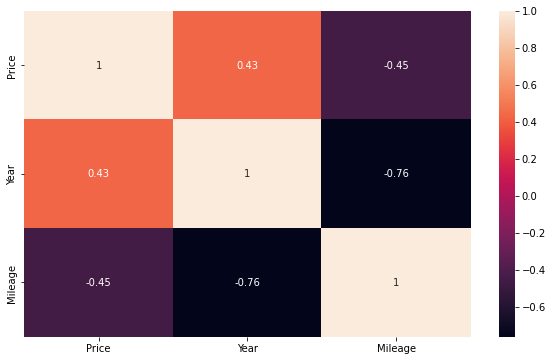

In [22]:
plt.figure(figsize=(10,6))
c = df.corr()
sns.heatmap(c,annot=True)
c

<function matplotlib.pyplot.show>

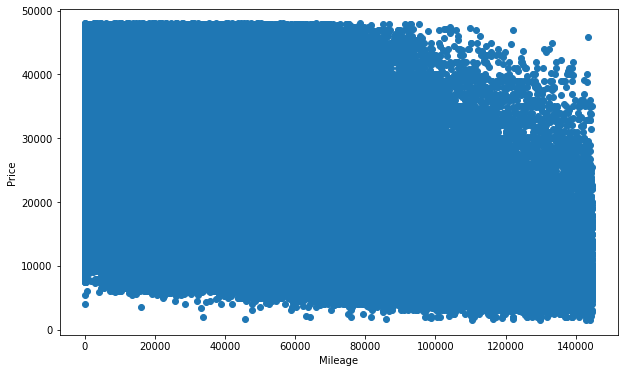

In [23]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Mileage'], df['Price'])
ax.set_xlabel('Mileage')
ax.set_ylabel('Price')
plt.show

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


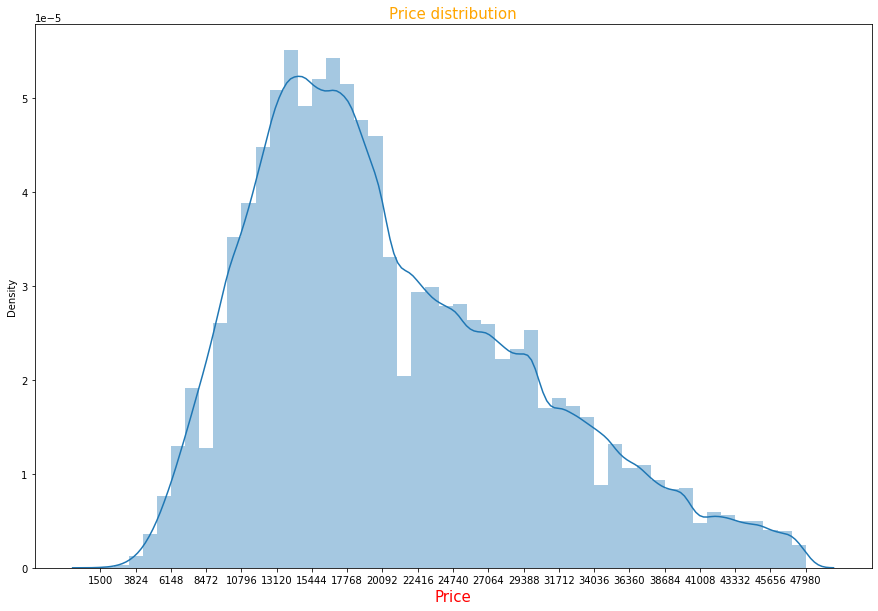

In [24]:
plt.figure (figsize=(15,10))
mins=df.Price.min()
maxs=df.Price.max()
scale=(maxs-mins)/20
sns.distplot(x=df['Price'])
plt.xlabel('Price',size=15, color='red')
plt.title('Price distribution',size=15,color='Orange')
plt.xticks(list(range(mins,maxs,int(scale))))
plt.show()

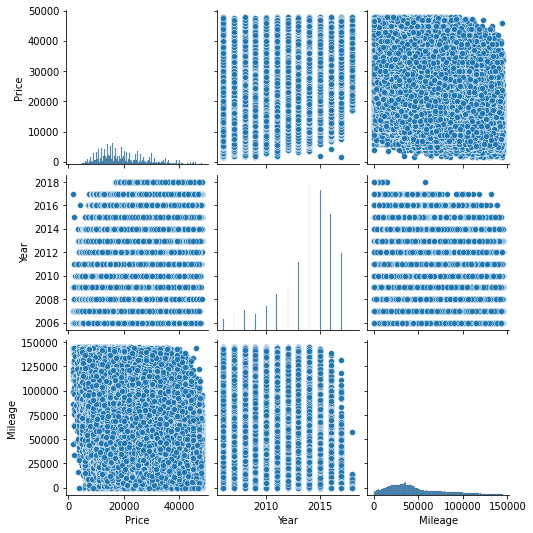

In [25]:
sns.pairplot(df)

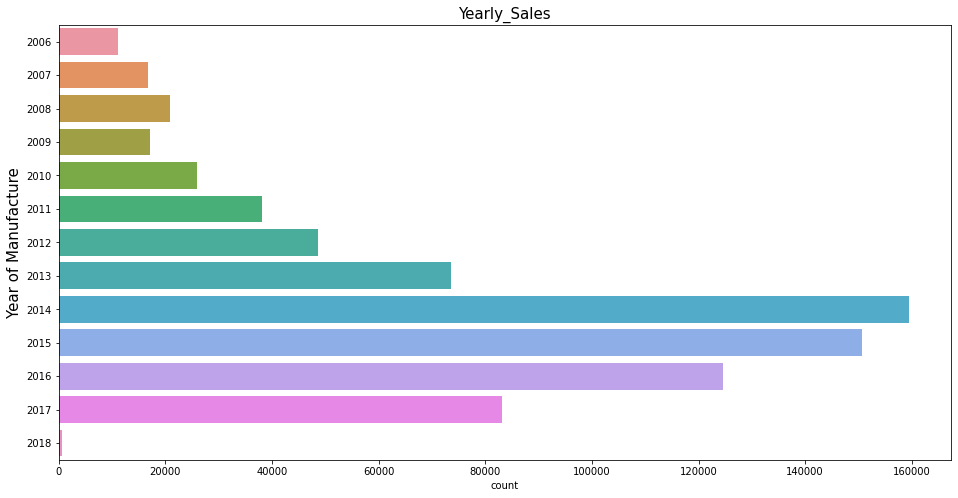

In [26]:
plt.figure(figsize=(16, 8))
sns.countplot(y=df['Year'])
plt.ylabel('Year of Manufacture',size=15)
plt.title('Yearly_Sales',size=15)
plt.show()


In [ ]:
#DNN

In [42]:
df_num = df.select_dtypes(include=[np.number])
df_cat = df.select_dtypes(include=[object])

In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_cat.head()

,City,State,Vin,Make,Model
0,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


In [44]:
encoded_cat= df_cat.apply(le.fit_transform)
encoded_cat

,City,State,Vin,Make,Model
0,646,49,3605,0,932
1,1259,39,3341,0,931
2,646,49,3603,0,932
3,2489,6,3458,0,931
4,1230,50,16,0,934
...,...,...,...,...,...
852076,1812,35,764229,47,1917
852089,1396,11,762874,47,1610
852108,2005,5,763144,47,1916
852111,2005,5,763241,47,1916


In [45]:
df = pd.concat([df_num,encoded_cat],axis=1)
df

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,646,49,3605,0,932
1,10888,2013,19606,1259,39,3341,0,931
2,8995,2013,48851,646,49,3603,0,932
3,10999,2014,39922,2489,6,3458,0,931
4,14799,2016,22142,1230,50,16,0,934
...,...,...,...,...,...,...,...,...
852076,37999,2016,10801,1812,35,764229,47,1917
852089,44565,2016,5650,1396,11,762874,47,1610
852108,45280,2017,8,2005,5,763144,47,1916
852111,46500,2017,8,2005,5,763241,47,1916


In [46]:
X = df.drop(['Price'],axis =1)
y=df['Price']

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=30)

In [48]:
classifier = Sequential()

In [49]:
classifier.add(Dense(units = 6, kernel_initializer='uniform', activation='relu'))

In [32]:
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

In [33]:
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [50]:
classifier.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [59]:
History=classifier.fit(X_train, y_train, batch_size = 10, epochs=40)

Epoch 1/40
61659/61659 [==============================] - 72s 1ms/step - loss: -104277.8984 - accuracy: 0.0000e+00
Epoch 2/40
61659/61659 [==============================] - 71s 1ms/step - loss: -104278.9375 - accuracy: 0.0000e+00
Epoch 3/40
61659/61659 [==============================] - 70s 1ms/step - loss: -104278.8984 - accuracy: 0.0000e+00
Epoch 4/40
61659/61659 [==============================] - 69s 1ms/step - loss: -104278.1094 - accuracy: 0.0000e+00
Epoch 5/40
61659/61659 [==============================] - 69s 1ms/step - loss: -104278.4062 - accuracy: 0.0000e+00
Epoch 6/40
61659/61659 [==============================] - 69s 1ms/step - loss: -104278.8047 - accuracy: 0.0000e+00
Epoch 7/40
61659/61659 [==============================] - 73s 1ms/step - loss: -104278.1719 - accuracy: 0.0000e+00
Epoch 8/40
61659/61659 [==============================] - 69s 1ms/step - loss: -104278.6406 - accuracy: 0.0000e+00
Epoch 9/40
61659/61659 [==============================] - 69s 1ms/step - loss: -

In [133]:
# evaluate the keras model
_, accuracy = classifier.evaluate(X, y)


24086/24086 [==============================] - 28s 1ms/step - loss: -104260.0859 - accuracy: 0.0000e+00


In [102]:
y_pred = classifier.predict(X_test)

In [103]:
epochs = range(100)
from tkinter import Frame

In [105]:
y_train

90461     16947
160807    34437
262800    11100
222778    18974
72828     24000
          ...  
548092    22991
367548    23900
634313    13975
636138    15590
481310    15421
Name: Price, Length: 616586, dtype: int64

In [122]:
from sklearn import metrics
print('Evaluate Model')
results = classifier.evaluate(X_test)

Evaluate Model
4818/4818 [==============================] - 6s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


In [ ]:
metrics.r2_score(y_test,y_pred)
#on test data

0.8591968907493969

In [ ]:
metrics.r2_score(y_train,y_pred)
#on train data

0.8586981800389554